In [10]:
from panel_segmentation import utils
import glob
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Run a system through the Hurricane Damage Detection Pipeline

First, let's pull some example images down from the hurricane data examples folder. This data is taken from the NOAA scan post-Hurricane Maria.

In [11]:
example_images = glob.glob("./panel_segmentation/examples/puerto_rico_hurricane_data_examples/*.jpg")
print(example_images)

['./panel_segmentation/examples/puerto_rico_hurricane_data_examples\\20170924aC0651800w181930n_18-3168545_-65-2790663_png.rf.37b3814858bcf6f8d5e6872877a65290.jpg', './panel_segmentation/examples/puerto_rico_hurricane_data_examples\\20170924aC0653300w180730n_18-1168545_-65-5491011_png.rf.8fc94433fbb4f461b6d245a006fd108e.jpg', './panel_segmentation/examples/puerto_rico_hurricane_data_examples\\20170924aC0653300w180730n_18-11694110003578_-65-54845271713663_png.rf.f0fd3a12457c4fedb1e71813b6f6ea8a.jpg', './panel_segmentation/examples/puerto_rico_hurricane_data_examples\\20170924aC0654800w180900n_18-130325377062075_-65-78995277940152_png.rf.78dcc79f6b7a37e9242aedc570eb6f6c.jpg', './panel_segmentation/examples/puerto_rico_hurricane_data_examples\\20170924bC0655230w182700n_18-426171329835693_-65-85222774604044_png.rf.641c0aee055e209848e164a1fa41392f.jpg', './panel_segmentation/examples/puerto_rico_hurricane_data_examples\\20170924bC0660000w182700n_18-430872733329714_-65-99894473514776_png.rf.2

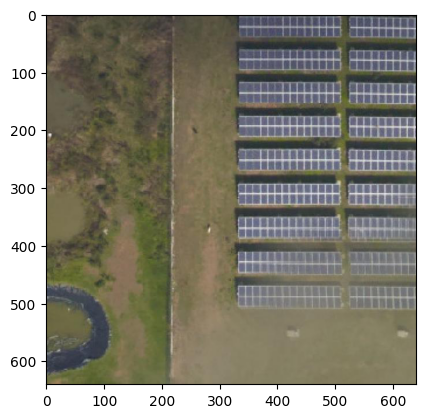

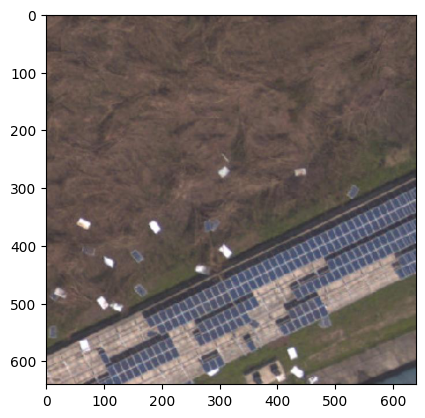

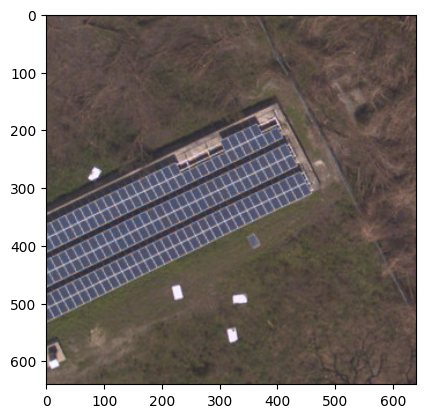

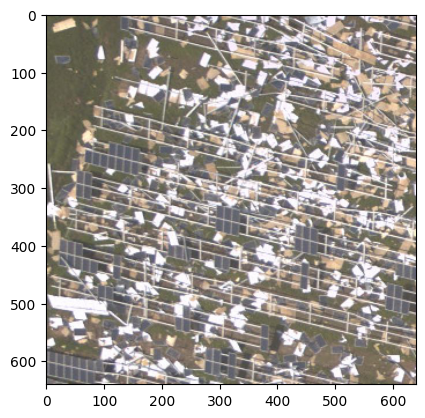

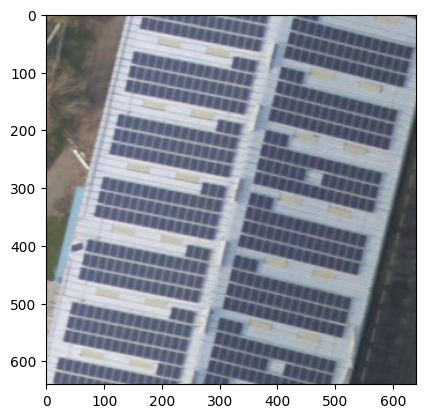

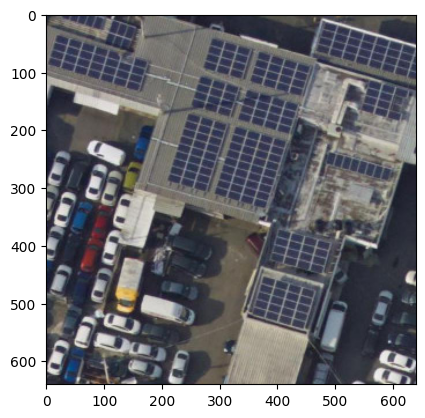

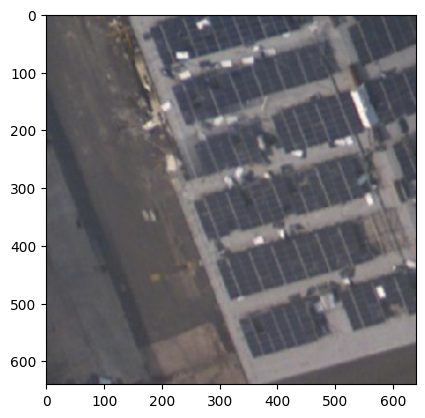

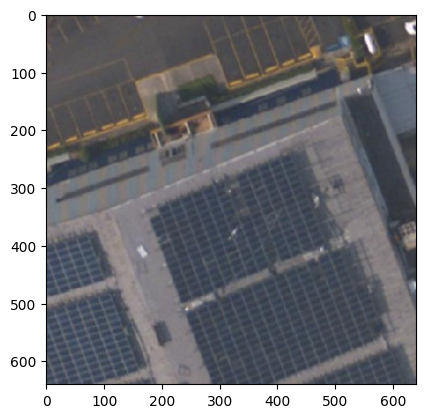

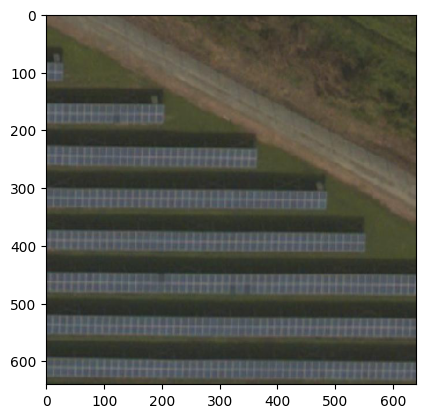

In [12]:
for image_file in example_images:
    img = Image.open(image_file)
    plt.imshow(img)
    plt.show()
    plt.close()

Let's load in the YOLOv11 hurricane model via Ultralytics.

In [13]:
hurricane_model_path = "./panel_segmentation/models/post-hurricane_model.pt"
hurricane_model = YOLO(hurricane_model_path)

Now we run the example images through the model and visualize the mask outputs.


0: 640x640 18 panels, 1897.7ms
1: 640x640 12 panels, 1897.7ms
2: 640x640 4 panels, 1897.7ms
3: 640x640 24 panels, 1897.7ms
4: 640x640 14 panels, 1897.7ms
5: 640x640 14 panels, 1897.7ms
6: 640x640 12 panels, 1897.7ms
7: 640x640 5 panels, 1897.7ms
8: 640x640 13 panels, 1897.7ms
9: 640x640 15 panels, 1897.7ms
10: 640x640 21 panels, 1897.7ms
11: 640x640 5 panels, 1897.7ms
Speed: 5.2ms preprocess, 1897.7ms inference, 18.5ms postprocess per image at shape (1, 3, 640, 640)


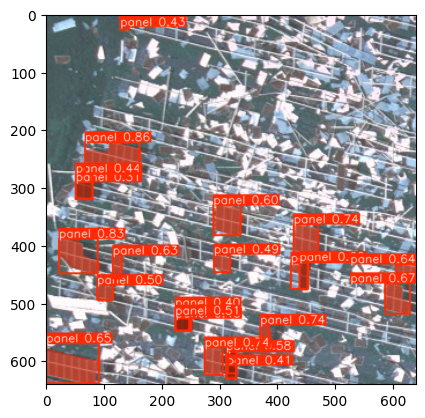

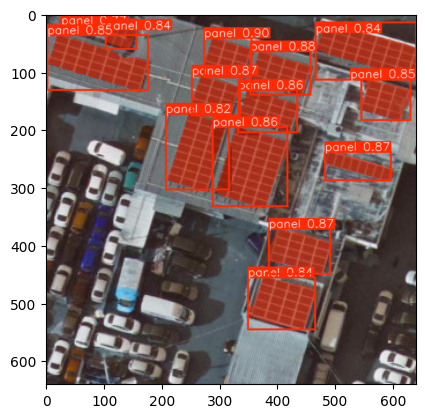

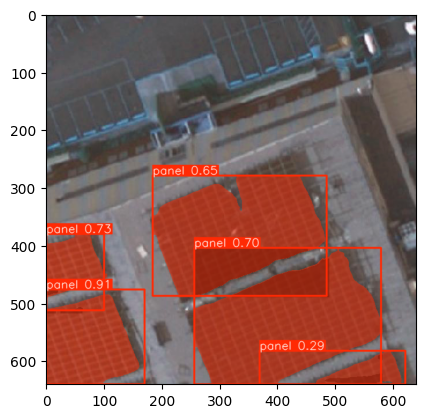

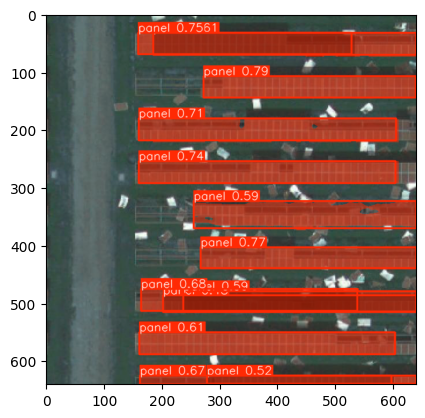

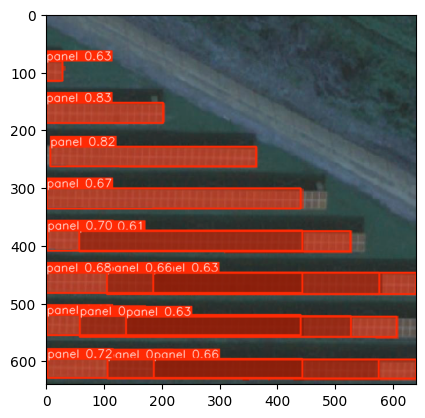

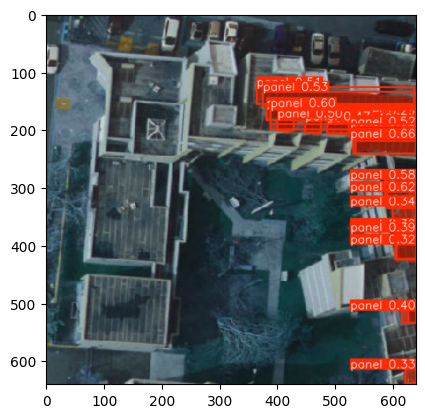

In [14]:
# Run inference on the example images
results = hurricane_model(example_images, overlap_mask=False)

# Visualize inference outputs
for result in results:
    plot = result.plot()
    plt.imshow(plot)
    plt.show()